In [94]:
import math

In [95]:
from graphviz import Digraph
def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

#### Value Object

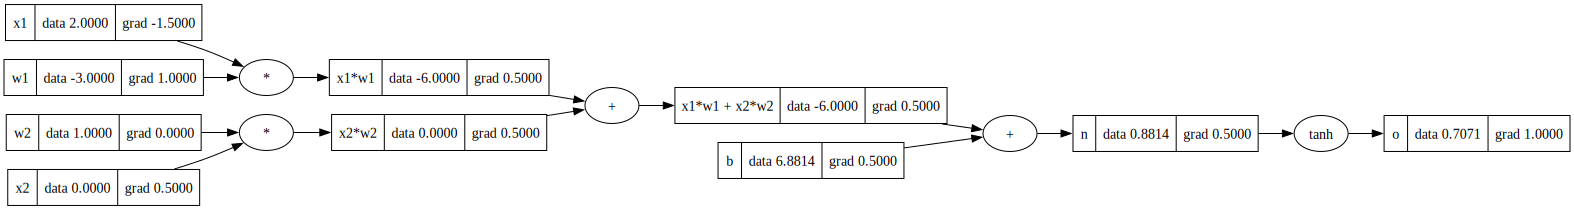

In [96]:
from value import Value

# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o.backward()
draw_dot(o)

#### Neuron Class

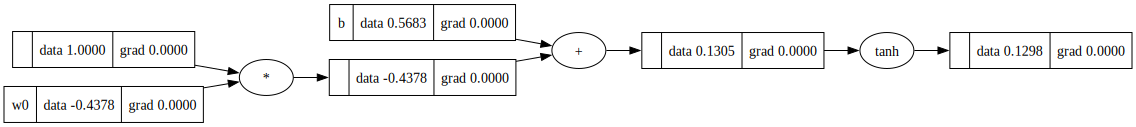

In [97]:
from neuralnet import Neuron

# inputs x1,x2
x = [1.0]
n = Neuron(1) # 2 inputs
# result
draw_dot(n(x))


#### Layer & MLP Class -> Neural Net
- example neural net
- 3 input data values
- 2 middle layers with 4 neurons each
- 1 output neuron

In [98]:
from neuralnet import Layer
from neuralnet import MLP

x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])

print(n(x))

Value(0.04454628986704199)


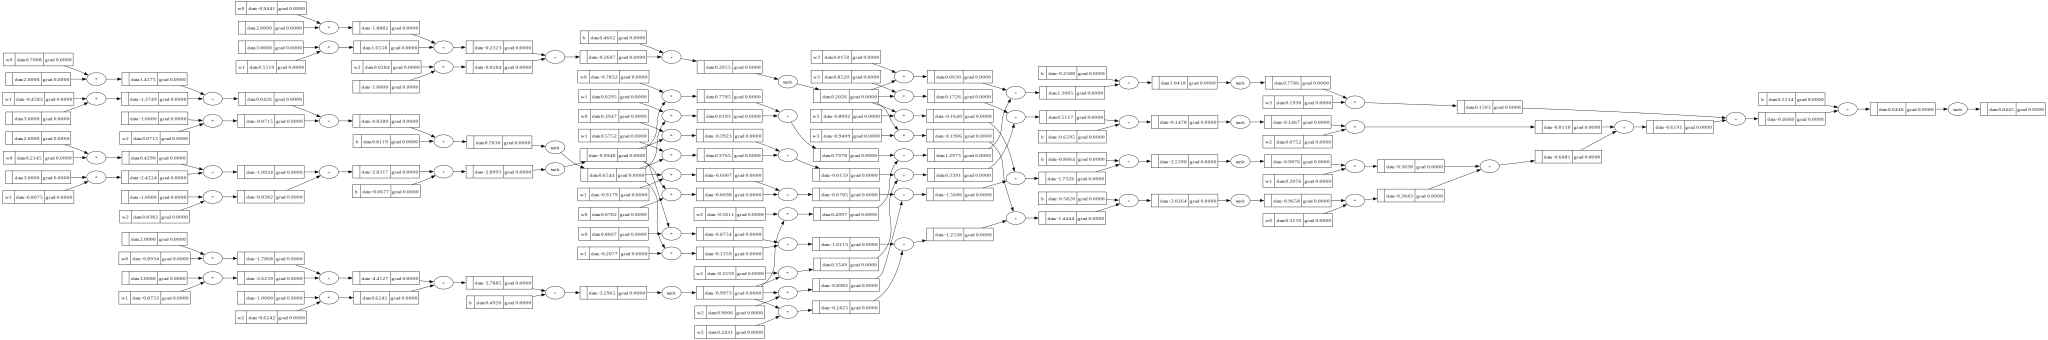

In [99]:
draw_dot(n(x))

#### Loss Function

- some random training data

In [100]:
# Random Training-Data
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

ys = [1.0, -1.0, -1.0, 1.0] # desired results

ypred = [n(x) for x in xs] # by the net predicted results
print(ypred)
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
print(loss)


[Value(0.04454628986704199), Value(0.30750766801579527), Value(-0.0011465405807377608), Value(0.018432388448888146)]
Value(4.583651303566921)


### Training with backpropabagation on `loss`

In [101]:
# Training

for k in range(20):
    # calculate all partial gradients for all components of the loss function
    for p in n.parameters():
        p.grad = 0.0 # important <- most common bug
    loss.backward()

    # #print example
    # print("n0_w0-data:", n.layers[0].neurons[0].w[0].data)
    # print("n0_w0-grad:", n.layers[0].neurons[0].w[0].grad)

    # adjust all weights and biases according to their gradients
    for p in n.parameters():
        p.data -= 0.01 * p.grad
    # print("n0_w0-data:", n.layers[0].neurons[0].w[0].data)

    # recalculate the loss
    ypred = [n(x) for x in xs] # by the net predicted results
    # print("Results", ypred)
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
    print(f'Loss {k+1}: {loss}')



Loss 1: Value(3.8999637447791637)
Loss 2: Value(3.318220235734837)
Loss 3: Value(2.7903504438215494)
Loss 4: Value(2.320569705951804)
Loss 5: Value(1.912728330815004)
Loss 6: Value(1.5673287252313401)
Loss 7: Value(1.282943559078144)
Loss 8: Value(1.054605211309493)
Loss 9: Value(0.874219010115254)
Loss 10: Value(0.7326320602754912)
Loss 11: Value(0.621350637416813)
Loss 12: Value(0.5333136467792741)
Loss 13: Value(0.4629958579156671)
Loss 14: Value(0.40620761899868096)
Loss 15: Value(0.3598159094522834)
Loss 16: Value(0.32148560797629566)
Loss 17: Value(0.28947098999638743)
Loss 18: Value(0.2624581226747756)
Loss 19: Value(0.2394493196581367)
Loss 20: Value(0.2196795462716961)
